In [1]:
import numpy as np
from PIL import Image

In [2]:
def cv_show(name, img_data):
    cv2.imshow(name, img_data)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def cv_save(name, img_data):
    cv2.imwrite(name, img_data)

In [3]:
img = Image.open("rabbit.png")
img_rgb = np.array(img.convert("RGB"))
img_b = img_rgb[:, :, 2]

In [4]:
def conv(arr, k):
    h, w = arr.shape
    new_arr = np.zeros((h, w), dtype=arr.dtype)
    kl = len(k)

    tmp_arr = np.pad(arr, (1, 1))

    for a in range(len(new_arr)):
        for b in range(len(new_arr[0])):
            tmp = np.sum(np.multiply(tmp_arr[a:a+len(k), b:b + len(k)], k))
            new_arr[a][b] = np.clip(tmp, 0.0, 255.0)
    return new_arr

In [5]:
kernel_b1 = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1], ])
kernel_b2 = np.array([[0, -1, 0],
                      [-1, 8, -1],
                      [0, -1, 0], ])

img_b1 = conv(img_b, kernel_b1)
img_b2 = conv(img_b, kernel_b2)

In [6]:
img_r = Image.fromarray(img_b1)
img_r.show()
img_r.save("img_b1.jpg")

In [7]:
img_r = Image.fromarray(img_b2)
img_r.show()
img_r.save("img_b2.jpg")

# ii

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt

In [73]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

In [74]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

In [75]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [76]:
n = 5000
x_train = x_train[1:n]
y_train = y_train[1:n]

In [77]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

orig x_train shape: (4999, 32, 32, 3)


In [78]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [79]:
model = keras.Sequential()

In [80]:
model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))

# model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
# model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))

model.add(Conv2D(8,(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(8,(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes,activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))

In [81]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 32)         

Epoch 1/20
36/36 [==============================] - 6s 166ms/step - loss: 2.3068 - accuracy: 0.1407 - val_loss: 2.1996 - val_accuracy: 0.2120
Epoch 2/20
36/36 [==============================] - 4s 95ms/step - loss: 2.1187 - accuracy: 0.2220 - val_loss: 1.9865 - val_accuracy: 0.3080
Epoch 3/20
36/36 [==============================] - 1s 28ms/step - loss: 1.9723 - accuracy: 0.2850 - val_loss: 2.0219 - val_accuracy: 0.3060
Epoch 4/20
36/36 [==============================] - 1s 29ms/step - loss: 1.9219 - accuracy: 0.3034 - val_loss: 1.8710 - val_accuracy: 0.3440
Epoch 5/20
36/36 [==============================] - 1s 39ms/step - loss: 1.8466 - accuracy: 0.3347 - val_loss: 1.7667 - val_accuracy: 0.4020
Epoch 6/20
36/36 [==============================] - 2s 50ms/step - loss: 1.7745 - accuracy: 0.3536 - val_loss: 1.7271 - val_accuracy: 0.3860
Epoch 7/20
36/36 [==============================] - 6s 163ms/step - loss: 1.7270 - accuracy: 0.3750 - val_loss: 1.6891 - val_accuracy: 0.4220
Epoch 8/20


INFO:tensorflow:Assets written to: cifar.model\assets


INFO:tensorflow:Assets written to: cifar.model\assets


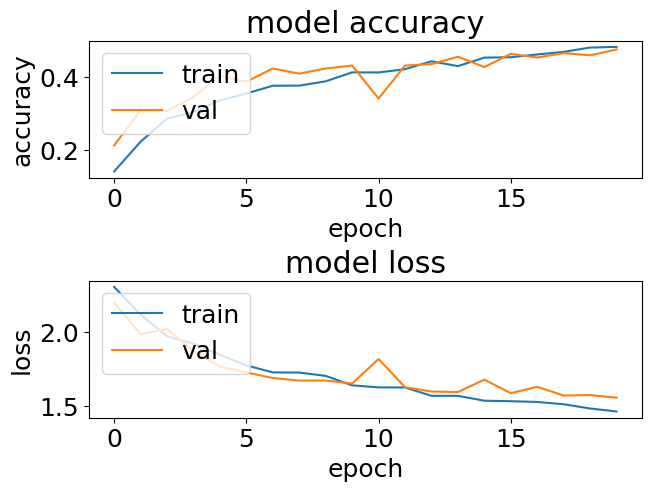

In [82]:
batch_size = 128
epochs = 20

start = time.time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end = time.time()
print('{} data, time of execution = {} min {} s'.format(n, int((end - start) / 60), int((end - start) % 60)))
    

model.save("cifar.model")
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1, y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))


## b. 3

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

import time

In [ ]:
def draw_model(n, x_train, y_train, x_test, y_test):
    x_train = x_train[1:n]
    y_train = y_train[1:n]

    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = keras.Sequential()

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))

    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    
    start = time.time()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    end = time.time()
    print('{} data, time of execution = {} min {} s'.format(n, int((end - start) / 60), int((end - start) % 60)))
    
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
draw_model(5000, x_train, y_train, x_test, y_test)

In [ ]:
draw_model(10000, x_train, y_train, x_test, y_test)

In [ ]:
draw_model(20000, x_train, y_train, x_test, y_test)

In [ ]:
draw_model(40000, x_train, y_train, x_test, y_test)

In [ ]:
def draw_model_2(num, x_train, y_train, x_test, y_test):
    n = 5000
    x_train = x_train[1:n]
    y_train = y_train[1:n]

    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = keras.Sequential()

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))

    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    
    start = time.time()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    end = time.time()
    print('{} data, time of execution = {} min {} s'.format(n, int((end - start) / 60), int((end - start) % 60)))
    
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
draw_model_2(0.0001, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(0.001, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(0.01, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(0.1, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(0, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(1, x_train, y_train, x_test, y_test)

In [ ]:
draw_model_2(10, x_train, y_train, x_test, y_test)